##  实验三   支持向量机
### 第1题  肺癌数据预测

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 导入肺癌数据集
data = load_breast_cancer()
X = data['data']
y = data['target']
print(X.shape)
    
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# 建立支持向量机模型
clf1 = SVC(kernel='linear')    #线性核函数
clf2 = SVC(kernel='rbf', C=10, gamma=0.0001) #采用高斯核函数
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)

# 输出两种支持向量机模型的精度。此处填入你的代码。（1）



(569, 30)


SVC(C=10, gamma=0.0001)

In [2]:
from sklearn.metrics import accuracy_score

# 对线性核函数模型进行预测并计算准确率
y_pred_linear = clf1.predict(x_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Accuracy of linear kernel: {:.2f}%".format(accuracy_linear * 100))

# 对高斯核函数模型进行预测并计算准确率
y_pred_rbf = clf2.predict(x_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("Accuracy of RBF kernel: {:.2f}%".format(accuracy_rbf * 100))

Accuracy of linear kernel: 95.32%
Accuracy of RBF kernel: 94.74%


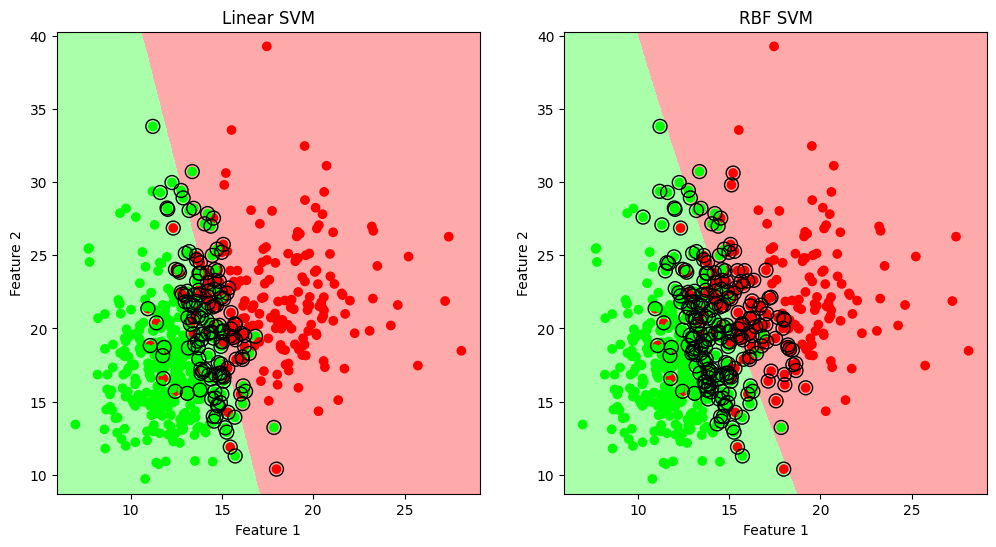

In [6]:
# 导入numpy模块
import numpy as np

# 定义一个函数，用于绘制支持向量机的决策边界
def plot_svm_decision_boundary(clf, X, y, title):
  # 获取数据集的最小值和最大值
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  # 生成网格点
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                       np.arange(y_min, y_max, 0.02))
  # 预测网格点的类别
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  # 将预测结果reshape为网格的形状
  Z = Z.reshape(xx.shape)
  # 定义颜色映射
  cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
  cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
  # 绘制背景颜色
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
  # 绘制数据点
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
  # 绘制支持向量
  plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=100,
              facecolors='none', edgecolors='k')
  # 设置标题和坐标轴标签
  plt.title(title)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  
# 只选择数据集中的前两个特征，方便可视化
X2 = X[:, :2]

# 建立两种支持向量机模型，使用前两个特征
clf3 = SVC(kernel='linear')
clf4 = SVC(kernel='rbf', C=10, gamma=0.0001)
clf3.fit(X2, y)
clf4.fit(X2, y)

# 绘制两种支持向量机模型的决策边界
plt.figure(figsize=(12,6))
plt.subplot(121)
plot_svm_decision_boundary(clf3, X2, y, 'Linear SVM')
plt.subplot(122)
plot_svm_decision_boundary(clf4, X2, y, 'RBF SVM')
plt.show()